<a href="https://colab.research.google.com/github/Sunyuyang11/datathon-2024/blob/main/Maching%20Leaning/Health_Drug_Overdose_in_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Load Data
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States_20240518.csv')

In [69]:
Data.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,6228.000000,5117.000000
mean,2.500000,1.578035,3.028902,3.383006,2008.664740,10.664740,1.354913,4.743443
std,1.707962,0.493913,1.447036,1.526819,5.849512,5.849512,0.301459,6.424471
min,0.000000,1.000000,0.000000,0.100000,1999.000000,1.000000,1.100000,0.000000
25%,1.000000,1.000000,2.000000,2.100000,2004.000000,6.000000,1.100000,0.800000
50%,2.500000,2.000000,3.000000,3.220000,2009.000000,11.000000,1.200000,2.100000
75%,4.000000,2.000000,4.000000,4.600000,2014.000000,16.000000,1.600000,6.000000
max,5.000000,2.000000,5.000000,5.930000,2018.000000,20.000000,1.910000,54.300000


In [70]:
Data.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [71]:
features = ['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM']
target = 'ESTIMATE'

data_clean = Data.dropna(subset=[target])

# Split the data into training and testing sets
X = data_clean[features]
y = data_clean[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error: " + str(mse))
print("R-squared: " + str(r2))

Mean Square Error: 0.8600580420922549
R-squared: 0.9803573438554029


In [73]:
# Train an XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

mse_xgboost, r2_xgboost

(0.7375903632141566, 0.9831543533446431)

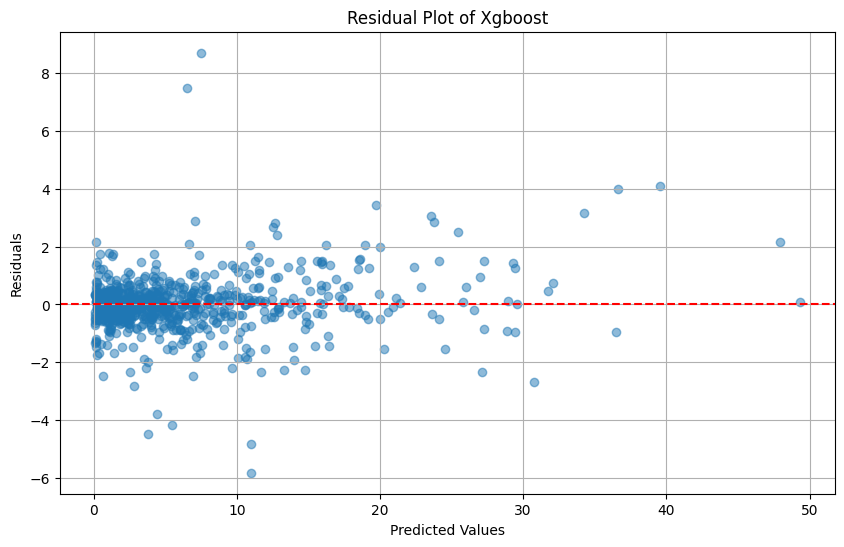

In [74]:
# Calculate residuals
residuals = y_test - y_pred_xgboost

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Xgboost')
plt.grid(True)
plt.show()

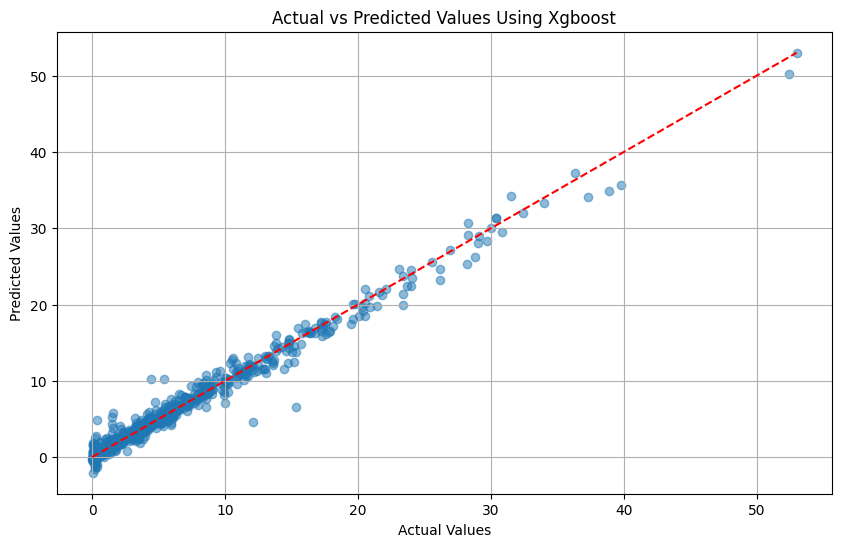

In [75]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgboost, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values Using Xgboost')
plt.grid(True)
plt.show()

In [77]:
X_test['ESTIMATE_PREDICTION'] = y_pred_xgboost
top_risk_demographics = X_test.sort_values(by='ESTIMATE_PREDICTION', ascending=False).head(10)

# Map the numeric features to their original string values using the original dataset
top_risk_demographics = top_risk_demographics.merge(
    data_clean,
    left_on=['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM'],
    right_on=['PANEL_NUM', 'UNIT_NUM', 'STUB_NAME_NUM', 'STUB_LABEL_NUM', 'YEAR_NUM', 'AGE_NUM'],
    how='left',
    suffixes=('', '_original')
)

# Select relevant columns for display with readable strings
top_risk_demographics_display_readable = top_risk_demographics[[
    'PANEL', 'UNIT', 'STUB_NAME', 'STUB_LABEL', 'YEAR', 'AGE', 'ESTIMATE_PREDICTION'
]]

top_risk_demographics_display_readable


,PANEL,UNIT,STUB_NAME,STUB_LABEL,YEAR,AGE,ESTIMATE_PREDICTION
0,All drug overdose deaths,"Deaths per 100,000 resident population, crude",Sex and age,Male: 35-44 years,2017,35-44 years,52.929489
1,All drug overdose deaths,"Deaths per 100,000 resident population, crude",Sex and age,Male: 35-44 years,2018,35-44 years,50.241844
2,All drug overdose deaths,"Deaths per 100,000 resident population, crude",Sex and age,Male: 35-44 years,2015,35-44 years,37.270729
3,Drug overdose deaths involving any opioid,"Deaths per 100,000 resident population, crude",Sex and age,Male: 25-34 years,2018,25-34 years,35.701958
4,Drug overdose deaths involving any opioid,"Deaths per 100,000 resident population, crude",Sex and age,Male: 35-44 years,2018,35-44 years,34.905132
5,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Sex and race and Hispanic origin,Male: Not Hispanic or Latino: American Indian ...,2017,All ages,34.183277
6,Drug overdose deaths involving any opioid,"Deaths per 100,000 resident population, crude",Sex and age,Male: 25-34 years,2016,25-34 years,34.151539
7,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Sex and race and Hispanic origin,Male: Not Hispanic or Latino: American Indian ...,2018,All ages,33.274250
8,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Sex and race and Hispanic origin (single race),Male: Not Hispanic or Latino: American Indian ...,2018,All ages,33.274250
9,All drug overdose deaths,"Deaths per 100,000 resident population, age-ad...",Sex and race and Hispanic origin,Male: Not Hispanic or Latino: Black,2018,All ages,31.941496
